In [1]:
# Functionalize network making algorithm
# Import Packages
import igraph as ig
import numpy as np

In [2]:
# Functions needed to generate network.
# The first define the elements of the symmetrized probability matrix. Supports 2x2 and 4x4
# The second initializes and edgeless network based on input nodetype and node numbers
# The third 
def makeProbMatrix(prob_list):
    if len(prob_list) == 2: 
        A = prob_list[0]
        B = prob_list[1]
        return [[A, B],[B, A]]
    else:
        A = prob_list[0]
        B = prob_list[1]
        C = prob_list[2]
        D = prob_list[3]
        return [[A, B, C, D],[B, A, D, C],[C, D, A, B],[D, C, B, A]]

def initializeNetwork(node_numbers, node_type):
    g = ig.Graph(directed = False)
    for k in range(len(node_numbers)):
        g.add_vertices(n = node_numbers[k])
        if k == 0:
            for m in range(0, node_numbers[k]):
                g.vs[m]['type'] = node_type[k]
                g.vs[m]['attr1'] = node_attribute1[k]
                g.vs[m]['attr2']  = node_attribute2[k]
        else:
            for m in range(sum(node_numbers[:k]), sum(node_numbers[:k+1])):
                g.vs[m]['type'] = node_type[k]
                g.vs[m]['attr1'] = node_attribute1[k]
                g.vs[m]['attr2'] = node_attribute2[k]
    return g

def addConnections(network, prob_matrix):
    for node in range(len(network.vs)):
        for other_node in range(node+1, total_Nodes):
            if (np.random.uniform()) < prob_matrix[network.vs[node]['type']][network.vs[other_node]['type']]:
                network.add_edge(node,other_node)
    return network

In [3]:
# Define n and P
# Each node is given a type which is based on the combination of attrbutes

node_numbers    = [20, 20, 20, 20] # Slows down a bit when total nodes > 400
total_Nodes     = sum(node_numbers)
node_type       = [0, 1, 2, 3]
node_attribute1 = [1, 1, 2, 2]
node_attribute2 = [1, 2, 1, 2]

prob_matrix =  makeProbMatrix([0.6, 0.07, 0.05, 0.02])

In [4]:
network = initializeNetwork(node_numbers, node_type)
network = addConnections(network, prob_matrix)

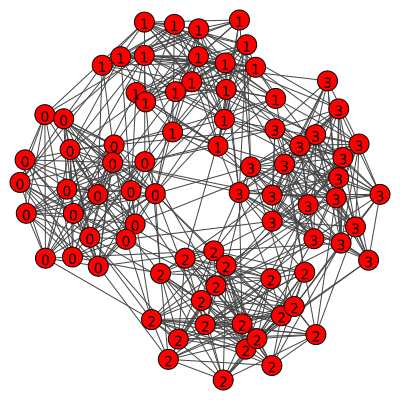

In [5]:
ig.plot(network , bbox=(0,0,400,400), vertex_label=network.vs['type'])